In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [4]:
file_path = "/Users/hyeonjaeyong/jyproject/td_regression/dataset_antoine.csv"
data = pd.read_csv(file_path)

print("data shape:", data.shape)
print("data columns:", data.columns)
print("data types:", data.dtypes)
print("data head:")
print(data)


data shape: (7, 2)
data columns: Index(['Temp_Celcius', 'Pressure_kPa'], dtype='object')
data types: Temp_Celcius    float64
Pressure_kPa    float64
dtype: object
data head:
   Temp_Celcius  Pressure_kPa
0         -18.5          3.18
1          -9.5          5.48
2           0.2          9.45
3          11.8         16.90
4          23.1         28.20
5          32.7         41.90
6          44.4         66.60


In [12]:
data['Temp_K'] = data["Temp_Celcius"] + 273.15
data["ln_pressure_kPa"] = np.log(data["Pressure_kPa"])
data["1/Temp_K"] = 1/data["Temp_K"]
print("Updated Dataset:")
print(data.head())


Updated Dataset:
   Temp_Celcius  Pressure_kPa  Temp_K  ln_pressure_kPa  1/Temp_K
0         -18.5          3.18  254.65         1.156881  0.003927
1          -9.5          5.48  263.65         1.701105  0.003793
2           0.2          9.45  273.35         2.246015  0.003658
3          11.8         16.90  284.95         2.827314  0.003509
4          23.1         28.20  296.25         3.339322  0.003376


In [24]:
from scipy.optimize import curve_fit

def correlation(temp_k, a,b,c):
    return a - b/ (temp_k + c)

X = data['Temp_K'].values
y = data['ln_pressure_kPa'].values

initial_guess = (100,1000,0)
params, covariance = curve_fit(correlation, X, y, p0=initial_guess, maxfev=10000)
a, b, c = params


print(f"Fitted parameters: a={a}, b={b}, c={c}")

y_pred = correlation(X, a, b, c)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")


Fitted parameters: a=13.934819619246882, b=2578.9823356432635, c=-52.806476409673486
Mean Squared Error: 1.7588717909022216e-05


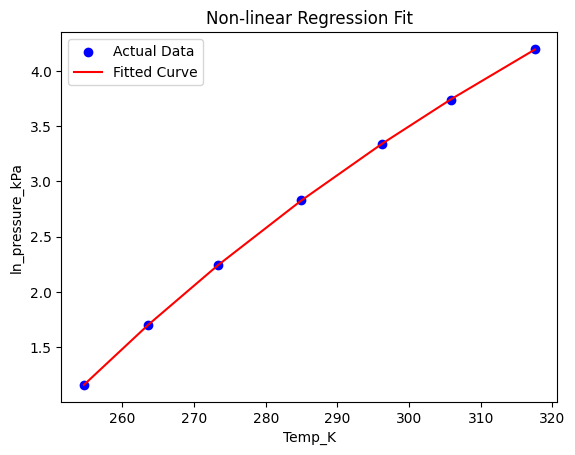

In [25]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Fitted Curve')
plt.xlabel('Temp_K')
plt.ylabel('ln_pressure_kPa')
plt.title('Non-linear Regression Fit')
plt.legend()
plt.show()